In [1]:
import scipy.optimize as scop
import titanic_project as titan
import numpy as np
import matplotlib.pyplot as plt

features = ['Survived', 'Pclass', 'Age', 'Sex', 'SibSp', 'Parch', 'Fare','Embarked','Name', 'Cabin', 'Ticket']
datain = titan.readdata('train.csv', 0.6, 0.6, features)
trainset = datain['train']
trainset.head()

,Survived,Pclass,Age,Sex,SibSp,Parch,Fare,Embarked,Name,Cabin,Ticket
0,0,3,22.0,-1,1,0,7.2500,1,"Braund, Mr. Owen Harris",NaN,A/5 21171
1,1,1,38.0,1,1,0,71.2833,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",C85,PC 17599
2,1,3,26.0,1,0,0,7.9250,1,"Heikkinen, Miss. Laina",NaN,STON/O2. 3101282
3,1,1,35.0,1,1,0,53.1000,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",C123,113803
4,0,3,35.0,-1,0,0,8.0500,1,"Allen, Mr. William Henry",NaN,373450


In [5]:
trainset.isnull().sum() / trainset.shape[0]

Survived    0.000000
Pclass      0.000000
Age         0.207477
Sex         0.000000
SibSp       0.000000
Parch       0.000000
Fare        0.000000
Embarked    0.000000
Name        0.000000
Cabin       0.773832
Ticket      0.000000
dtype: float64

Majority of the Cabin information is missing. 

In [27]:
cabinclass = trainset.Cabin.apply(lambda x: str(x)[0])
trainset = trainset.assign(cabclass = cabinclass)
ckey = cabinclass.unique()
cnum = np.arange(0, ckey.size)
ckey2num = dict(zip(ckey, cnum))
trainset.cabclass = trainset.cabclass.map(ckey2num)
trainset.corr()

,Survived,Pclass,Age,Sex,SibSp,Parch,Fare,Embarked,cabclass
Survived,1.000000,-0.270099,-0.094232,0.571729,-0.046940,0.087018,0.205579,0.108864,0.242205
Pclass,-0.270099,1.000000,-0.359838,-0.115367,0.101060,0.001775,-0.586986,0.054265,-0.529018
Age,-0.094232,-0.359838,1.000000,-0.091064,-0.353861,-0.238634,0.083645,0.018236,0.137889
Sex,0.571729,-0.115367,-0.091064,1.000000,0.070997,0.168163,0.180971,0.115029,0.111086
SibSp,-0.046940,0.101060,-0.353861,0.070997,1.000000,0.440383,0.181967,-0.041111,-0.065250
Parch,0.087018,0.001775,-0.238634,0.168163,0.440383,1.000000,0.260505,-0.124586,0.054288
Fare,0.205579,-0.586986,0.083645,0.180971,0.181967,0.260505,1.000000,0.038452,0.325645
Embarked,0.108864,0.054265,0.018236,0.115029,-0.041111,-0.124586,0.038452,1.000000,-0.005776
cabclass,0.242205,-0.529018,0.137889,0.111086,-0.065250,0.054288,0.325645,-0.005776,1.000000


In [28]:
features = ['Survived', 'Pclass', 'Age', 'Sex', 'SibSp', 'Parch', 'Fare','Embarked','Name', 'Cabin', 'Ticket']
testin = titan.readdata('test.csv', 1, 1, features)
testset = testin['train']
testset.head()

,Survived,Pclass,Age,Sex,SibSp,Parch,Fare,Embarked,Name,Cabin,Ticket
0,NaN,3,34.5,-1,0,0,7.8292,3,"Kelly, Mr. James",NaN,330911
1,NaN,3,47.0,1,1,0,7.0000,1,"Wilkes, Mrs. James (Ellen Needs)",NaN,363272
2,NaN,2,62.0,-1,0,0,9.6875,3,"Myles, Mr. Thomas Francis",NaN,240276
3,NaN,3,27.0,-1,0,0,8.6625,1,"Wirz, Mr. Albert",NaN,315154
4,NaN,3,22.0,1,1,1,12.2875,1,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",NaN,3101298


In [29]:
testset.isnull().sum() / testset.shape[0]

Survived    1.000000
Pclass      0.000000
Age         0.205742
Sex         0.000000
SibSp       0.000000
Parch       0.000000
Fare        0.002392
Embarked    0.000000
Name        0.000000
Cabin       0.782297
Ticket      0.000000
dtype: float64

In [30]:
ckey2num

{'A': 5, 'B': 6, 'C': 1, 'D': 4, 'E': 2, 'F': 7, 'G': 3, 'T': 8, 'n': 0}

In [7]:
y_predict[y_predict > 0.5] = 1

In [8]:
y_predict[y_predict <= 0.5] = 0

In [9]:
(y_predict == y).sum()*1.0/y.size

0.79883381924198249

In [10]:
regpara = np.array([0, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]) * 0.5
trainerror = np.zeros(shape = (regpara.size, 1))
vaderror = np.zeros(shape = (regpara.size, 1))

for i in range(0, regpara.size):
    theta = scop.fmin_l_bfgs_b(titan.lfCost, theta0, titan.lfGradient, (X, y, regpara[i]))[0]
    trainerror[i] = titan.lfCost(theta, X, y, 0.0)
    vaderror[i] = titan.lfCost(theta, Xvad, yvad, 0.0)

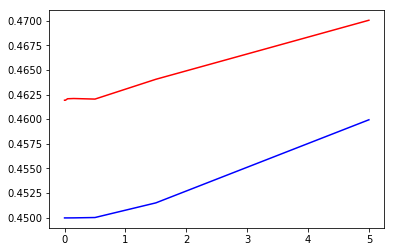

In [11]:
plt.plot(regpara, trainerror, '-b', regpara, vaderror,'-r')
plt.show()

In [12]:
tp = np.linspace(0.2, 0.7, 20)

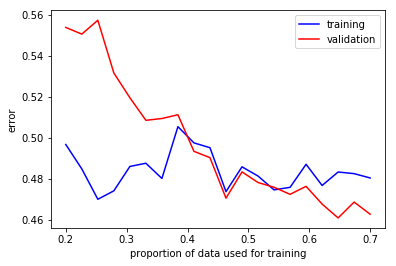

In [14]:
trainerror = np.zeros(shape = (tp.size, 1))
vaderror = np.zeros(shape = (tp.size, 1))
for i in range(0, tp.size):
    datain = titan.readdata('train.csv', tp[i], 0.7, features)
    X = np.array(datain['train'].ix[:,1:])
    y = np.array(datain['train'].ix[:,0])
    Xvad = np.array(datain['validation'].ix[:,1:])
    yvad = np.array(datain['validation'].ix[:,0])
    nfeature = X.shape[1]
    theta0 = np.zeros(shape = (nfeature, 1))
    regpara = 1.0
    theta = scop.fmin_l_bfgs_b(titan.lfCost, theta0, titan.lfGradient, (X, y, regpara))[0]
    trainerror[i] = titan.lfCost(theta, X, y, 0.0)
    vaderror[i] = titan.lfCost(theta, Xvad, yvad, 0.0)
plt.plot(tp, trainerror, '-b', tp, vaderror,'-r')
plt.xlabel('proportion of data used for training')
plt.ylabel('error')
plt.legend(['training','validation'])
plt.show()

The learning curve suggests at leat 60% of the train.csv dataset is needed to produce a reasonable model. 

In [15]:
datain = titan.readdata('train.csv', 0.7, 0.7, features)
X = np.array(datain['train'].ix[:,1:])
y = np.array(datain['train'].ix[:,0])
Xvad = np.array(datain['validation'].ix[:,1:])
yvad = np.array(datain['validation'].ix[:,0])

In [18]:
Xq = titan.normdata(titan.xquad(X))
Xvadq = titan.normdata(titan.xquad(Xvad))
Xq = np.concatenate((np.ones(shape=(Xq.shape[0], 1)), Xq), axis = 1)
Xvadq = np.concatenate((np.ones(shape=(Xvadq.shape[0], 1)), Xvadq), axis = 1)

nfeature = Xq.shape[1]
theta0 = np.zeros(shape = (nfeature, 1))
regpara = 1.0

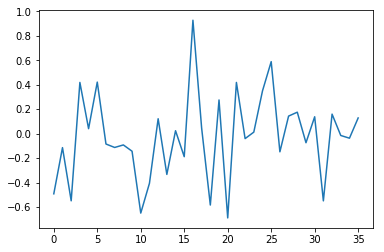

In [19]:
w = scop.fmin_l_bfgs_b(titan.lfCost, theta0, titan.lfGradient, (Xq, y, regpara))
plt.plot(w[0])
plt.show()

The figure above shows the weight of each features used in the 2nd order polynomial model. Some parameters stood out while some have very little contributions to the regression.

In [20]:
y_predict = titan.sigmoid(np.dot(Xq,w[0]))
y_predict[y_predict > 0.5] = 1
y_predict[y_predict <= 0.5] = 0
(y_predict == y).sum()*1.0/y.size

0.81909547738693467

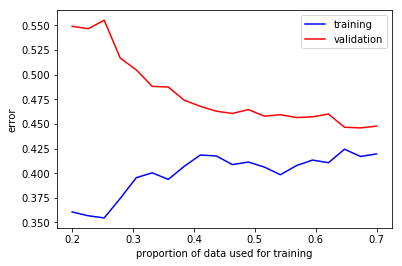

In [23]:
trainerror = np.zeros(shape = (tp.size, 1))
vaderror = np.zeros(shape = (tp.size, 1))
for i in range(0, tp.size):
    datain = titan.readdata('train.csv', tp[i], 0.7, features)
    X = np.array(datain['train'].ix[:,1:])
    y = np.array(datain['train'].ix[:,0])
    Xvad = np.array(datain['validation'].ix[:,1:])
    yvad = np.array(datain['validation'].ix[:,0])
    
    Xq = titan.normdata(titan.xquad(X))
    Xvadq = titan.normdata(titan.xquad(Xvad))
    Xq = np.concatenate((np.ones(shape=(Xq.shape[0], 1)), Xq), axis = 1)
    Xvadq = np.concatenate((np.ones(shape=(Xvadq.shape[0], 1)), Xvadq), axis = 1)

    nfeature = Xq.shape[1]
    theta0 = np.zeros(shape = (nfeature, 1))
    regpara = 1.0
    theta = scop.fmin_l_bfgs_b(titan.lfCost, theta0, titan.lfGradient, (Xq, y, regpara))[0]
    trainerror[i] = titan.lfCost(theta, Xq, y, 0.0)
    vaderror[i] = titan.lfCost(theta, Xvadq, yvad, 0.0)
plt.plot(tp, trainerror, '-b', tp, vaderror,'-r')
plt.xlabel('proportion of data used for training')
plt.ylabel('error')
plt.legend(['training','validation'])
plt.show()

The learning curve suggests that with training data more than 50% of the train.csv dataset the model is able to avoid being overfitting, which is a problem with less than 40% of the data used for training. The absolute error for the validation set is smaller compared to the linear model, suggesting adding 2nd order terms improves the performance of the regression. To further reduce the error, we can try more complex set of features or models more advanced than logistic regression.

In [24]:
yvad_predict = titan.sigmoid(np.dot(Xvadq,w[0]))
yvad_predict[yvad_predict > 0.5] = 1
yvad_predict[yvad_predict <= 0.5] = 0
(yvad_predict == yvad).sum()*1.0/yvad.size

0.81072555205047314

The 2nd order terms gives an accuracy of 81% in the validation set.

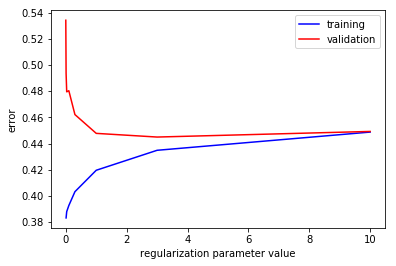

In [26]:
regpara = np.array([0, 0.01, 0.03, 0.1, 0.3, 1, 3, 10])
trainerror = np.zeros(shape = (regpara.size, 1))
vaderror = np.zeros(shape = (regpara.size, 1))

for i in range(0, regpara.size):
    theta = scop.fmin_l_bfgs_b(titan.lfCost, theta0, titan.lfGradient, (Xq, y, regpara[i]))[0]
    trainerror[i] = titan.lfCost(theta, Xq, y, 0.0)
    vaderror[i] = titan.lfCost(theta, Xvadq, yvad, 0.0)
plt.plot(regpara, trainerror, '-b', regpara, vaderror,'-r')
plt.xlabel('regularization parameter value')
plt.ylabel('error')
plt.legend(['training','validation'])
plt.show()

The figure above suggests the optimum regularization parameter to use is 3. 

Now we take Age out of the input features to test the model. A large number of passengers on the list doesn't have age information available. Therefore it is important to find a model works for those passengers.

In [27]:
features = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare','Embarked']

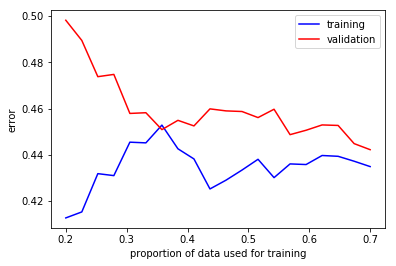

In [28]:
trainerror = np.zeros(shape = (tp.size, 1))
vaderror = np.zeros(shape = (tp.size, 1))
for i in range(0, tp.size):
    datain = titan.readdata('train.csv', tp[i], 0.7, features)
    X = np.array(datain['train'].ix[:,1:])
    y = np.array(datain['train'].ix[:,0])
    Xvad = np.array(datain['validation'].ix[:,1:])
    yvad = np.array(datain['validation'].ix[:,0])
    
    Xq = titan.normdata(titan.xquad(X))
    Xvadq = titan.normdata(titan.xquad(Xvad))
    Xq = np.concatenate((np.ones(shape=(Xq.shape[0], 1)), Xq), axis = 1)
    Xvadq = np.concatenate((np.ones(shape=(Xvadq.shape[0], 1)), Xvadq), axis = 1)
    
    nfeature = Xq.shape[1]
    theta0 = np.zeros(shape = (nfeature, 1))
    regpara = 1.0
    theta = scop.fmin_l_bfgs_b(titan.lfCost, theta0, titan.lfGradient, (Xq, y, regpara))[0]
    trainerror[i] = titan.lfCost(theta, Xq, y, 0.0)
    vaderror[i] = titan.lfCost(theta, Xvadq, yvad, 0.0)
plt.plot(tp, trainerror, '-b', tp, vaderror,'-r')
plt.xlabel('proportion of data used for training')
plt.ylabel('error')
plt.legend(['training','validation'])
plt.show()

As expected, the error increased without Age information. But still close to the original model. The learning curve suggests adding more data improves the performance on training and validation set.

In [29]:
datain = titan.readdata('train.csv', 0.6, 0.6, features)
X = np.array(datain['train'].ix[:,1:])
y = np.array(datain['train'].ix[:,0])
Xvad = np.array(datain['validation'].ix[:,1:])
yvad = np.array(datain['validation'].ix[:,0])

In [31]:
Xq = titan.normdata(titan.xquad(X))
Xvadq = titan.normdata(titan.xquad(Xvad))
Xq = np.concatenate((np.ones(shape=(Xq.shape[0], 1)), Xq), axis = 1)
Xvadq = np.concatenate((np.ones(shape=(Xvadq.shape[0], 1)), Xvadq), axis = 1)

nfeature = Xq.shape[1]
theta0 = np.zeros(shape = (nfeature, 1))
regpara = 1.0

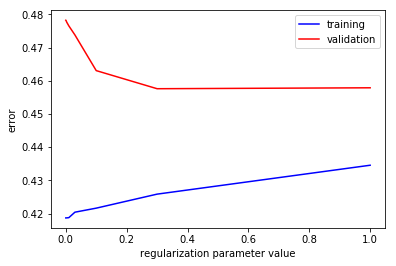

In [32]:
regpara = np.array([0, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]) * 0.1
trainerror = np.zeros(shape = (regpara.size, 1))
vaderror = np.zeros(shape = (regpara.size, 1))

for i in range(0, regpara.size):
    theta = scop.fmin_l_bfgs_b(titan.lfCost, theta0, titan.lfGradient, (Xq, y, regpara[i]))[0]
    trainerror[i] = titan.lfCost(theta, Xq, y, 0.0)
    vaderror[i] = titan.lfCost(theta, Xvadq, yvad, 0.0)
plt.plot(regpara, trainerror, '-b', regpara, vaderror,'-r')
plt.xlabel('regularization parameter value')
plt.ylabel('error')
plt.legend(['training','validation'])
plt.show()

The figure above sugests that the optimum regularization parameter to use is 0.3. Using this value and the optimum training data set size (60% of total data), we estimate the accuracy of the model

In [33]:
theta = scop.fmin_l_bfgs_b(titan.lfCost, theta0, titan.lfGradient, (Xq, y, 0.3))[0]

In [34]:
yvad_predict = titan.sigmoid(np.dot(Xvadq,theta))
yvad_predict[yvad_predict > 0.5] = 1
yvad_predict[yvad_predict <= 0.5] = 0
(yvad_predict == yvad).sum()*1.0/yvad.size

0.79551820728291311

Without Age the model accuracy drops by 2-3% in the validation dataset. We try to recover the age information from other information available. After carefully examining the data, it seems a person's title is loosely correlated to the person's age. For example, those with the title 'Master' are usually children and have younger ages. Here I group passengers by sex, social class, and title. For those without age i the data base I assign the median age of the group they belong to as their age.

The first step is to parse the name to get titles.

In [5]:
features = ['Survived', 'Pclass', 'Age', 'Sex', 'SibSp', 'Parch', 'Fare','Embarked','Name']
datain = titan.readdata('train.csv', 0.6, 0.6, features)

In [6]:
datain['train'].Name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
5                                       Moran, Mr. James
6                                McCarthy, Mr. Timothy J
7                         Palsson, Master. Gosta Leonard
8      Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                    Nasser, Mrs. Nicholas (Adele Achem)
10                       Sandstrom, Miss. Marguerite Rut
11                              Bonnell, Miss. Elizabeth
12                        Saundercock, Mr. William Henry
13                           Andersson, Mr. Anders Johan
14                  Vestrom, Miss. Hulda Amanda Adolfina
15                      Hewlett, Mrs. (Mary D Kingcome) 
16                                  Rice, Master. Eugene
17                          Wil

The name entry has a fixed format: First name, comma, title, period, last name, then other names.
The split() method for string in Python provides an easy way to split the different parts and retain the title. For example:

In [7]:
datain['train'].Name[0].split(',')[1].split('.')[0]

' Mr'

In [8]:
def name2title(name):
    return name.split(',')[1].split('.')[0]

In [9]:
title = datain['train'].Name.apply(name2title)

In [10]:
title.value_counts()

 Mr        302
 Miss      121
 Mrs        76
 Master     26
 Dr          3
 Rev         3
 Ms          1
 Don         1
 Mme         1
 Major       1
Name: Name, dtype: int64

Most of the titles are the common Mr., Miss., Mrs., with a small fraction of Master. There are just a handful of others like Dr., Rev., and Don. Due to the small number of those titles compared to the others, it can be misleading to use them as classifier. Mme (according to Wikipedia) is the abbreviation of a female title (likely married since there is another one for unmarried), therefore it to be treated equal to Mrs. Below we look for the correlation of those titles to other features, especially with Age.

In [11]:
a = datain['train'].groupby(title)['Age'].median()
a

Name
 Don       40.0
 Dr        44.0
 Major     52.0
 Master     3.5
 Miss      21.0
 Mme       24.0
 Mr        30.0
 Mrs       35.0
 Ms        28.0
 Rev       51.0
Name: Age, dtype: float64

It is obvious that each title group has a distinct median age. This is what we wanted. We can then filling those missing ages by mapping their title to the median age of each title group. The same treatmean will be applied to the test set. There might be a different set of unique titles in the test set but I assume the correlation of title to age still holds. 

In [12]:
import titanic_project as titan

In [36]:
features = ['Survived', 'Pclass', 'Age', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked','Name']
datain = titan.readdata('train.csv', 0.6, 0.6, features)

In [37]:
X = np.array(datain['train'].ix[:,1:-1])
y = np.array(datain['train'].ix[:,0])

Xvad = np.array(datain['validation'].ix[:,1:-1])
yvad = np.array(datain['validation'].ix[:,0])

Xq = titan.normdata(titan.xquad(X))
Xvadq = titan.normdata(titan.xquad(Xvad))
Xq = np.concatenate((np.ones(shape=(Xq.shape[0], 1)), Xq), axis = 1)
Xvadq = np.concatenate((np.ones(shape=(Xvadq.shape[0], 1)), Xvadq), axis = 1)

nfeature = Xq.shape[1]
theta0 = np.zeros(shape = (nfeature, 1))
regpara = 1.0

In [38]:
w = scop.fmin_l_bfgs_b(titan.lfCost, theta0, titan.lfGradient, (Xq, y, regpara))

In [39]:
y_predict = titan.sigmoid(np.dot(Xq,w[0]))
y_predict[y_predict > 0.5] = 1
y_predict[y_predict <= 0.5] = 0
(y_predict == y).sum()*1.0/y.size

0.83177570093457942

In [40]:
yvad_predict = titan.sigmoid(np.dot(Xvadq,w[0]))
yvad_predict[yvad_predict > 0.5] = 1
yvad_predict[yvad_predict <= 0.5] = 0
(yvad_predict == yvad).sum()*1.0/yvad.size

0.81792717086834732

As expected, the validation set accuracy is improved.

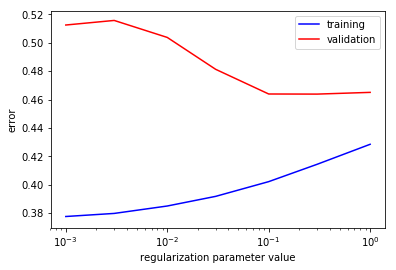

In [41]:
regpara = np.array([0, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]) * 0.1
trainerror = np.zeros(shape = (regpara.size, 1))
vaderror = np.zeros(shape = (regpara.size, 1))
trainacu = np.zeros(shape = (regpara.size, 1))
vadacu = np.zeros(shape = (regpara.size, 1))

for i in range(0, regpara.size):
    theta = scop.fmin_l_bfgs_b(titan.lfCost, theta0, titan.lfGradient, (Xq, y, regpara[i]))[0]
    trainerror[i] = titan.lfCost(theta, Xq, y, regpara[i])
    vaderror[i] = titan.lfCost(theta, Xvadq, yvad, regpara[i])
    trainacu[i] = titan.getacu(theta, Xq, y)
    vadacu[i] = titan.getacu(theta, Xvadq, yvad)
plt.semilogx(regpara, trainerror, '-b', regpara, vaderror,'-r')
plt.xlabel('regularization parameter value')
plt.ylabel('error')
plt.legend(['training','validation'])
plt.show()

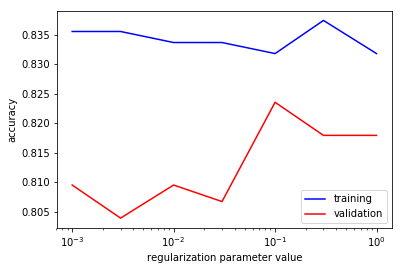

In [42]:
plt.semilogx(regpara, trainacu, '-b', regpara, vadacu,'-r')
plt.xlabel('regularization parameter value')
plt.ylabel('accuracy')
plt.legend(['training','validation'])
plt.show()

In [43]:
w = scop.fmin_l_bfgs_b(titan.lfCost, theta0, titan.lfGradient, (Xq, y, 0.1))

In [44]:
yvad_predict = titan.sigmoid(np.dot(Xvadq,w[0]))
yvad_predict[yvad_predict > 0.5] = 1
yvad_predict[yvad_predict <= 0.5] = 0
(yvad_predict == yvad).sum()*1.0/yvad.size

0.82352941176470584

With the optimum regularization parameter the accuracy for the validation set is 82%.

I now take a closer look at the features to further improve the model.

In [17]:
age_gender = datain['train'].loc[:,'Age']
age_gender[datain['train'].Sex == -1] = -age_gender[datain['train'].Sex == -1]

C:\Users\theya\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


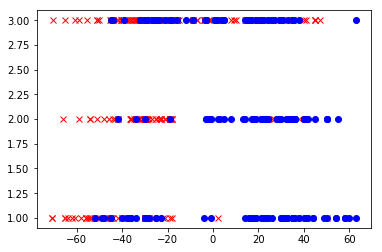

In [18]:
plt.plot(age_gender[y == 0], datain['train'].Pclass[y == 0], 'xr')
plt.plot(age_gender[y == 1], datain['train'].Pclass[y == 1], 'ob')
plt.show()

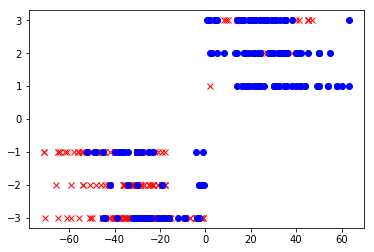

In [68]:
pclass_gender = datain['train'].loc[:,'Pclass']
pclass_gender[datain['train'].Sex == 0.5] = -pclass_gender[datain['train'].Sex == 0.5]
plt.plot(age_gender[y == 0], pclass_gender[y == 0], 'xr')
plt.plot(age_gender[y == 1], pclass_gender[y == 1], 'ob')
plt.show()

In the plot above the age is multipled with gender (male = -1, female = 1) and the resulting separation for survived (blue dots) and not survived (red x) is much more clearer than before. The figure above is probably the reason why the second order poly model works better than linear model.

In the orginal model Sex is mapped with {'female': 1; 'male': 0.5} but that doesnt give enough separation between the two genders when multiplied to other terms. Below I change the mapping to {'female': 1; 'male': -1}.

In [2]:
import titanic_project as titan

In [5]:
features = ['Survived', 'Pclass', 'Age', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked','Name']
datain = titan.readdata('train.csv', 0.6, 0.6, features)

In [3]:
X = np.array(datain['train'].ix[:,1:-1])
y = np.array(datain['train'].ix[:,0])

Xvad = np.array(datain['validation'].ix[:,1:-1])
yvad = np.array(datain['validation'].ix[:,0])

Xq = titan.normdata(titan.xquad(X))
Xvadq = titan.normdata(titan.xquad(Xvad))
Xq = np.concatenate((np.ones(shape=(Xq.shape[0], 1)), Xq), axis = 1)
Xvadq = np.concatenate((np.ones(shape=(Xvadq.shape[0], 1)), Xvadq), axis = 1)

nfeature = Xq.shape[1]
theta0 = np.zeros(shape = (nfeature, 1))
regpara = 1.0

In [4]:
w = scop.fmin_l_bfgs_b(titan.lfCost, theta0, titan.lfGradient, (Xq, y, regpara))

In [5]:
y_predict = titan.sigmoid(np.dot(Xq,w[0]))
y_predict[y_predict > 0.5] = 1
y_predict[y_predict <= 0.5] = 0
(y_predict == y).sum()*1.0/y.size

0.83738317757009351

In [6]:
yvad_predict = titan.sigmoid(np.dot(Xvadq,w[0]))
yvad_predict[yvad_predict > 0.5] = 1
yvad_predict[yvad_predict <= 0.5] = 0
(yvad_predict == yvad).sum()*1.0/yvad.size

0.82072829131652658

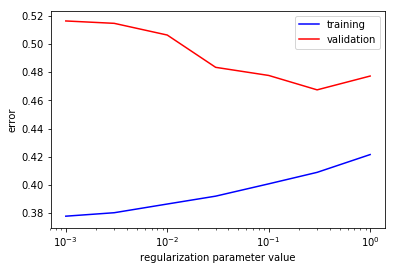

In [7]:
regpara = np.array([0, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]) * 0.1
trainerror = np.zeros(shape = (regpara.size, 1))
vaderror = np.zeros(shape = (regpara.size, 1))
trainacu = np.zeros(shape = (regpara.size, 1))
vadacu = np.zeros(shape = (regpara.size, 1))

for i in range(0, regpara.size):
    theta = scop.fmin_l_bfgs_b(titan.lfCost, theta0, titan.lfGradient, (Xq, y, regpara[i]))[0]
    trainerror[i] = titan.lfCost(theta, Xq, y, regpara[i])
    vaderror[i] = titan.lfCost(theta, Xvadq, yvad, regpara[i])
    trainacu[i] = titan.getacu(theta, Xq, y)
    vadacu[i] = titan.getacu(theta, Xvadq, yvad)
plt.semilogx(regpara, trainerror, '-b', regpara, vaderror,'-r')
plt.xlabel('regularization parameter value')
plt.ylabel('error')
plt.legend(['training','validation'])
plt.show()

In [8]:
w = scop.fmin_l_bfgs_b(titan.lfCost, theta0, titan.lfGradient, (Xq, y, 0.3))

In [9]:
yvad_predict = titan.sigmoid(np.dot(Xvadq,w[0]))
yvad_predict[yvad_predict > 0.5] = 1
yvad_predict[yvad_predict <= 0.5] = 0
(yvad_predict == yvad).sum()*1.0/yvad.size

0.8263305322128851

The model improves slightly. However, the accuracy is still only around 80%. The figure with age and pclass (above) illustates the difficulties even 2nd order polynomial could face: large overlap of data with different results (survivied or not). For example, female with smaller family size and aged between 20 and 40 has a large number of survived and unsurvived passengers. Decision boundary can not separate them apart easily. 

In [13]:
X = np.array(datain['train'].ix[:,1:-1])
y = np.array(datain['train'].ix[:,0])

Xvad = np.array(datain['validation'].ix[:,1:-1])
yvad = np.array(datain['validation'].ix[:,0])

In [14]:
"""
gender = X[:, 2]
vadgender = Xvad[:, 2]
X[gender == -1, :] = -X[gender == -1, :]
Xvad[vadgender == -1, :] = -Xvad[vadgender == -1, :]
X[:, 2] = gender
Xvad[:, 2] = vadgender
"""

regpara = 1.0
order = np.arange(1, 10)

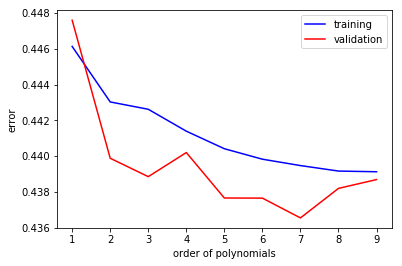

In [15]:
trainerror = np.zeros(shape = (order.size, 1))
vaderror = np.zeros(shape = (order.size, 1))

for i in range(0, order.size):
    Xp = titan.normdata(titan.polyx(X, order[i]))
    Xvadp = titan.normdata(titan.polyx(Xvad, order[i]))
    Xp = np.concatenate((np.ones(shape=(Xp.shape[0], 1)), Xp), axis = 1)
    Xvadp = np.concatenate((np.ones(shape=(Xvadp.shape[0], 1)), Xvadp), axis = 1)
    theta0 = np.zeros(shape = (Xp.shape[1], 1))
    theta = scop.fmin_l_bfgs_b(titan.lfCost, theta0, titan.lfGradient, (Xp, y, regpara))[0]
    trainerror[i] = titan.lfCost(theta, Xp, y, 0.0)
    vaderror[i] = titan.lfCost(theta, Xvadp, yvad, 0.0)
plt.plot(order, trainerror, '-b', order, vaderror,'-r')
plt.xlabel('order of polynomials')
plt.ylabel('error')
plt.legend(['training','validation'])
plt.show()

It suggests that order = 7 is optimum. With polynomial orders higher than 2 the model becomes highly variant.

In [16]:
order = 7
Xp = titan.normdata(titan.polyx(X, order))
Xvadp = titan.normdata(titan.polyx(Xvad, order))
Xp = np.concatenate((np.ones(shape=(Xp.shape[0], 1)), Xp), axis = 1)
Xvadp = np.concatenate((np.ones(shape=(Xvadp.shape[0], 1)), Xvadp), axis = 1)
theta0 = np.zeros(shape = (Xp.shape[1], 1))
w = scop.fmin_l_bfgs_b(titan.lfCost, theta0, titan.lfGradient, (Xp, y, 1.0))

In [17]:
yvad_predict = titan.sigmoid(np.dot(Xvadp,w[0]))
yvad_predict[yvad_predict > 0.5] = 1
yvad_predict[yvad_predict <= 0.5] = 0
(yvad_predict == yvad).sum()*1.0/yvad.size

0.80112044817927175

The performance is not better than the full second order polynomial terms (including cross terms) where the accuracy was 82.6%. The reason is again illustrated in the crossplots of different features above. When gender is considered as an independent feature the separation between survived and not survived is not great. Higher order polynomials can help but ultimately the feature is not good enough. When combining gender and other features the separation is much better. 

In [18]:
X = np.array(datain['train'].ix[:,1:-1])
y = np.array(datain['train'].ix[:,0])

Xvad = np.array(datain['validation'].ix[:,1:-1])
yvad = np.array(datain['validation'].ix[:,0])
gender = X[:, 2]
vadgender = Xvad[:, 2]

In [19]:
gender_age = np.copy(X[:, 1])
gender_age[X[:,2] == -1] = -gender_age[X[:,2] == -1]
X = np.concatenate((X, gender_age.reshape(X.shape[0], 1)), axis = 1)
gender_age = np.copy(Xvad[:, 1])
gender_age[Xvad[:,2] == -1] = -gender_age[Xvad[:,2] == -1]
Xvad = np.concatenate((Xvad, gender_age.reshape(Xvad.shape[0], 1)), axis = 1)

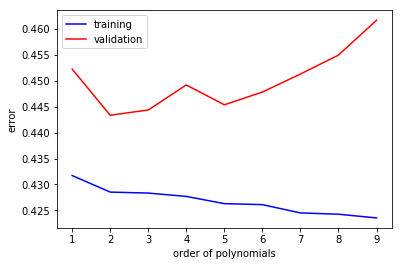

In [20]:
regpara = 1.0
order = np.arange(1, 10)
trainerror = np.zeros(shape = (order.size, 1))
vaderror = np.zeros(shape = (order.size, 1))

for i in range(0, order.size):
    Xp = titan.normdata(titan.polyx(X, order[i]))
    Xvadp = titan.normdata(titan.polyx(Xvad, order[i]))
    Xp = np.concatenate((np.ones(shape=(Xp.shape[0], 1)), Xp), axis = 1)
    Xvadp = np.concatenate((np.ones(shape=(Xvadp.shape[0], 1)), Xvadp), axis = 1)
    theta0 = np.zeros(shape = (Xp.shape[1], 1))
    theta = scop.fmin_l_bfgs_b(titan.lfCost, theta0, titan.lfGradient, (Xp, y, regpara))[0]
    trainerror[i] = titan.lfCost(theta, Xp, y, 0.0)
    vaderror[i] = titan.lfCost(theta, Xvadp, yvad, 0.0)
plt.plot(order, trainerror, '-b', order, vaderror,'-r')
plt.xlabel('order of polynomials')
plt.ylabel('error')
plt.legend(['training','validation'])
plt.show()

In [36]:
order = 2
Xp = titan.normdata(titan.polyx(X, order))
Xvadp = titan.normdata(titan.polyx(Xvad, order))
Xp = np.concatenate((np.ones(shape=(Xp.shape[0], 1)), Xp), axis = 1)
Xvadp = np.concatenate((np.ones(shape=(Xvadp.shape[0], 1)), Xvadp), axis = 1)
theta0 = np.zeros(shape = (Xp.shape[1], 1))
w = scop.fmin_l_bfgs_b(titan.lfCost, theta0, titan.lfGradient, (Xp, y, 1.0))

In [37]:
yvad_predict = titan.sigmoid(np.dot(Xvadp,w[0]))
yvad_predict[yvad_predict > 0.5] = 1
yvad_predict[yvad_predict <= 0.5] = 0
(yvad_predict == yvad).sum()*1.0/yvad.size

0.79271708683473385

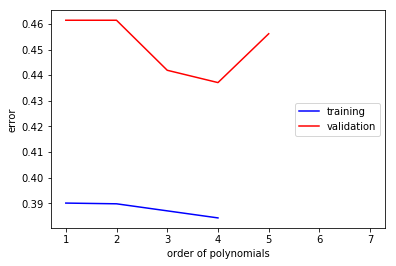

In [64]:
X = np.array(datain['train'].ix[:,1:-1])
y = np.array(datain['train'].ix[:,0])
Xvad = np.array(datain['validation'].ix[:,1:-1])
yvad = np.array(datain['validation'].ix[:,0])

Xq = titan.normdata(titan.xquad(X))
Xvadq = titan.normdata(titan.xquad(Xvad))

regpara = 0.1
order = np.arange(1, 10)
trainerror = np.zeros(shape = (order.size, 1))
vaderror = np.zeros(shape = (order.size, 1))

for i in range(0, order.size):
    Xp = titan.normdata(titan.polyx(X, order[i]))
    Xvadp = titan.normdata(titan.polyx(Xvad, order[i]))
    Xp = np.concatenate((np.ones(shape=(Xp.shape[0], 1)), Xp), axis = 1)
    Xvadp = np.concatenate((np.ones(shape=(Xvadp.shape[0], 1)), Xvadp), axis = 1)
    Xp = np.concatenate((Xp, Xq[:, 7:]), axis = 1)
    Xvadp = np.concatenate((Xvadp, Xvadq[:, 7:]), axis = 1)
    theta0 = np.zeros(shape = (Xp.shape[1], 1))
    theta = scop.fmin_l_bfgs_b(titan.lfCost, theta0, titan.lfGradient, (Xp, y, regpara))[0]
    trainerror[i] = titan.lfCost(theta, Xp, y, 0.0)
    vaderror[i] = titan.lfCost(theta, Xvadp, yvad, 0.0)
plt.plot(order, trainerror, '-b', order, vaderror,'-r')
plt.xlabel('order of polynomials')
plt.ylabel('error')
plt.legend(['training','validation'])
plt.show()

In [80]:
order = 2
Xp = titan.normdata(titan.polyx(Xq, order))
Xvadp = titan.normdata(titan.polyx(Xvadq, order))
Xp = np.concatenate((np.ones(shape=(Xp.shape[0], 1)), Xp), axis = 1)
Xvadp = np.concatenate((np.ones(shape=(Xvadp.shape[0], 1)), Xvadp), axis = 1)
Xp = np.concatenate((Xp, Xq[:, 7:]), axis = 1)
Xvadp = np.concatenate((Xvadp, Xvadq[:, 7:]), axis = 1)
theta0 = np.zeros(shape = (Xp.shape[1], 1))
w = scop.fmin_l_bfgs_b(titan.lfCost, theta0, titan.lfGradient, (Xp, y, 1.0))

In [81]:
yvad_predict = titan.sigmoid(np.dot(Xvadp,w[0]))
yvad_predict[yvad_predict > 0.5] = 1
yvad_predict[yvad_predict <= 0.5] = 0
(yvad_predict == yvad).sum()*1.0/yvad.size

0.8263305322128851